# Imports

In [73]:
import pandas as pd
import numpy as np

import unicodedata
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.core.display import display, HTML

import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

%matplotlib inline

# Data

In [74]:
#df = pd.read_csv('data/postings.csv')
df = pd.read_pickle('data/postings.pk')

In [75]:
resume = None

with open('data/Liveproject Resume.txt') as file_handle:
    resume = file_handle.read()

In [76]:
df.head()

,job_posting,title,body,bullets
1,3157fcef3ee474da_fccid.html,"Data Scientist - Mountain View, CA","Data Scientist - Mountain View, CA\nGroundTrut...","(Help senior members of the team to explore, d..."
2,b423ca22a6e2c10f_fccid.html,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nA Bachelor or Ma...",(A Bachelor or Masters Degree in a highly quan...
5,a559b6630c13783d_fccid.html,"Junior Data Scientist - College Park, MD 20740","Junior Data Scientist - College Park, MD 20740...",(Degree: Bachelor’s degree in business analyti...
6,f579e807b5804620_fccid.html,"Data Scientist - New York, NY","Data Scientist - New York, NY\nDescription\nDS...","(Languages: Python, PySpark, SQL, Data Tools: ..."
8,13c9ffc0bcb07c8d_fccid.html,"(Entry-Level) Data Scientist - Chicago, IL","(Entry-Level) Data Scientist - Chicago, IL\nDa...",(Be the go-to person for Data ingest and stora...


In [77]:
df.shape

(547, 4)

# Data Cleaning

In [78]:
stop_words = stopwords.words('english')

In [79]:
def clean_text(text):

    p_text = text.translate(str.maketrans('', '', string.punctuation))
    p_text = p_text.translate(str.maketrans('', '', string.digits))
    p_text = unicodedata.normalize('NFKD', p_text)\
                        .encode('ascii', 'ignore')\
                        .decode('utf-8', 'ignore')\
                        .replace('\n\t', ' ')\
                        .replace('\n', ' ')\
                        .replace('  ', ' ')\
                        .replace('   ', ' ')\
                        .rstrip()\
                        .lower()

    p_text = ' '.join([word for word in word_tokenize(p_text) if word not in stop_words])
    return p_text

In [80]:
print(resume)

﻿Good Student
Data Scientist
	  

Good Student
123 Fake Street
Some City, QT 12345
123.456.7890
no_reply@fakesite.com
	ㅡ
Skills
	  

Python, Pandas, machine learning, natural language processing
	ㅡ
Experience
	  

Manning / Data Analyst
Oct 2019 - PRESENT,  REMOTE
Analyzed and visualized vast amounts of data using Pandas, Python, and Matplotlib.
	ㅡ
Education
	  

Berkeley / B.S. Mathematics
August 2015 - May 2019,  BERKELEY, CA
Graduated summa cum laude.

	ㅡ
Awards
	  

Tau Beta Pi Honors Society



In [81]:
resume_clean = clean_text(resume)

In [82]:
print(resume_clean)

good student data scientist good student fake street city qt noreplyfakesitecom skills python pandas machine learning natural language processing experience manning data analyst oct present remote analyzed visualized vast amounts data using pandas python matplotlib education berkeley bs mathematics august may berkeley ca graduated summa cum laude awards tau beta pi honors society


# Most Similar Job Postings

In [83]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [84]:
all_text = [resume_clean] + list(df.body.values)

In [85]:
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)

In [86]:
tfidf_matrix.shape

(548, 10504)

In [87]:
tfidf_matrix

<548x10504 sparse matrix of type '<class 'numpy.float64'>'
	with 137996 stored elements in Compressed Sparse Row format>

In [88]:
tfidf_matrix[1:]

<547x10504 sparse matrix of type '<class 'numpy.float64'>'
	with 137951 stored elements in Compressed Sparse Row format>

In [89]:
tfidf_np_array = tfidf_matrix.toarray()

In [90]:
tfidf_np_array.shape

(548, 10504)

In [91]:
resume_vector = tfidf_np_array[0]

In [92]:
resume_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
resume_non_zero_indicese = np.flatnonzero(resume_vector)

In [94]:
resume_non_zero_indicese

array([  809,   827,   836,  1143,  1192,  1326,  1332,  1535,  1592,
        1874,  2534,  2605,  3231,  3657,  3785,  4293,  4328,  4607,
        5379,  5403,  5450,  5702,  5773,  5848,  5854,  6278,  6417,
        6538,  6801,  7031,  7300,  7395,  7626,  7642,  7979,  8413,
        8727,  8795,  9114,  9140,  9217,  9377, 10037, 10092, 10206])

In [95]:
tfidf_vectorizer.get_feature_names()[6741]

'outreach'

In [96]:
resume_vector[439]

0.0

In [97]:
cosine_similarities = tfidf_np_array @ resume_vector

In [98]:
cosine_similarities.shape

(548,)

In [99]:
cosine_similarities

array([1.        , 0.03656315, 0.03212824, 0.04710856, 0.04776399,
       0.04784007, 0.02947135, 0.04569168, 0.02477074, 0.03719617,
       0.04185613, 0.03013836, 0.01811983, 0.0331796 , 0.03339704,
       0.03370796, 0.02424623, 0.03611727, 0.05958316, 0.05115576,
       0.02375922, 0.05580878, 0.03683623, 0.042278  , 0.03825048,
       0.02090162, 0.0316538 , 0.02781903, 0.03103378, 0.04759673,
       0.0293221 , 0.01114431, 0.02282376, 0.03283336, 0.06565593,
       0.02280891, 0.03103136, 0.02565548, 0.02640051, 0.03571938,
       0.02820561, 0.01512904, 0.03034683, 0.04168372, 0.04474052,
       0.03393241, 0.0281583 , 0.05149678, 0.03366453, 0.02540816,
       0.02234916, 0.04251005, 0.03378357, 0.03399715, 0.02766028,
       0.04473279, 0.06413112, 0.0301422 , 0.02184162, 0.03819545,
       0.04226667, 0.02009489, 0.05077916, 0.0433869 , 0.03105372,
       0.0332967 , 0.0265997 , 0.0186361 , 0.02650701, 0.03878105,
       0.0361262 , 0.05531024, 0.04581799, 0.03665936, 0.05077

In [100]:
np.sort(cosine_similarities)[::-2]

array([1.        , 0.17215383, 0.1009268 , 0.08902016, 0.08647286,
       0.07919497, 0.07857773, 0.07655368, 0.0706851 , 0.06941746,
       0.0690338 , 0.06857353, 0.06783235, 0.06682848, 0.06565593,
       0.06504194, 0.06475156, 0.06454167, 0.06373836, 0.06294508,
       0.06269471, 0.061772  , 0.06087381, 0.06012121, 0.05997521,
       0.05828293, 0.05742187, 0.05718749, 0.05654107, 0.05586448,
       0.05548433, 0.05541459, 0.05531024, 0.05515483, 0.05494682,
       0.05467124, 0.05427041, 0.05359114, 0.05295042, 0.05261738,
       0.05247512, 0.05222321, 0.05204695, 0.05149678, 0.05115828,
       0.05077916, 0.05013079, 0.04991425, 0.04971338, 0.04959947,
       0.04916841, 0.0488444 , 0.04827325, 0.04784007, 0.04781181,
       0.04759673, 0.04742534, 0.04699789, 0.04689769, 0.04666263,
       0.04649378, 0.04613062, 0.04601693, 0.04581799, 0.0456557 ,
       0.04529495, 0.04520619, 0.04504377, 0.0448732 , 0.04474052,
       0.04472974, 0.04468151, 0.04451596, 0.04434526, 0.04416

In [101]:
df['similarity'] = cosine_similarities[1:]

In [102]:
df.sort_values(by='similarity', ascending=False, inplace=True)

In [103]:
df.reset_index(inplace=True, drop=True)

In [104]:
df.head(n=5)

,job_posting,title,body,bullets,similarity
0,f0d9ab737db4e7ce_fccid.html,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.181381
1,17a320fb30c7c7ab_fccid.html,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.172154
2,28d1f60ff04cab03_fccid.html,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.108137
3,d1aac424aa1a8a50_fccid.html,"Machine Learning Intern - San Diego, CA","Machine Learning Intern - San Diego, CA\nInnov...",(Design and develop machine learning models to...,0.100927
4,ef7046b5961f249e_fccid.html,Data Science Summer Institute Student Intern -...,Data Science Summer Institute Student Intern -...,"(Students will work with scientists, engineers...",0.098023


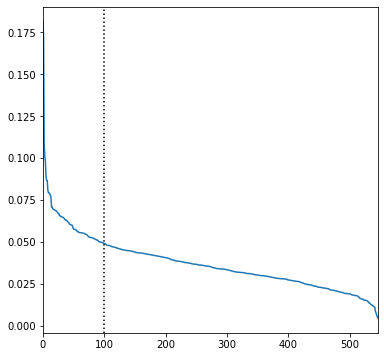

In [105]:
plt.figure(figsize=(6,6))
df['similarity'].plot()
plt.axvline(100, c='black', ls='dotted')

## The Highest Match

In [106]:
with open('data/html_job_postings/'+df.head(n=1).job_posting.values[0]) as jpost:
    display(HTML(jpost.read()))

## The Lowest Match

In [107]:
with open('data/html_job_postings/'+df.tail(n=1).job_posting.values[0]) as jpost:
    display(HTML(jpost.read()))

In [108]:
most_similar_df = df.iloc[:100].copy()

In [109]:
most_similar_df.head()

,job_posting,title,body,bullets,similarity
0,f0d9ab737db4e7ce_fccid.html,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.181381
1,17a320fb30c7c7ab_fccid.html,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.172154
2,28d1f60ff04cab03_fccid.html,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.108137
3,d1aac424aa1a8a50_fccid.html,"Machine Learning Intern - San Diego, CA","Machine Learning Intern - San Diego, CA\nInnov...",(Design and develop machine learning models to...,0.100927
4,ef7046b5961f249e_fccid.html,Data Science Summer Institute Student Intern -...,Data Science Summer Institute Student Intern -...,"(Students will work with scientists, engineers...",0.098023


## Dimensionality Reduction

In [110]:
bullet_points = [item for sublist in most_similar_df['bullets'] for item in sublist]

In [111]:
len(bullet_points)

1679

In [112]:
bullet_points[:5]

['Demonstrated ability to propose, initiate, and carry out ambitious data-intensive research projects.',
 'Entrepreneurial abilities: demonstrated skills in finding unmet needs, translating those into tractable solutions that can be implemented, and working with few specifically assigned resources.',
 'Self-motivated and works well both independently and as part of a team.',
 'Strong collaboration skills with highly technical researchers and ability to engage across a variety of methodological fields (e.g., computer science, mathematics, and statistics), computational platforms, and ideally, research domains (e.g., health sciences, life sciences, social sciences, and medicine).',
 'Excellent and demonstrated ability to regularly, effectively communicate with management teams.']

In [113]:
bullet_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_skills = bullet_vectorizer.fit_transform(bullet_points)

In [114]:
tfidf_skills.shape

(1679, 2526)

In [115]:
svd_object = TruncatedSVD(n_components=500)

In [116]:
svd_transformed_data = svd_object.fit_transform(tfidf_skills)
normalized_tfidf = normalize(svd_transformed_data)

In [117]:
normalized_tfidf.shape

(1679, 500)

In [118]:
percent_variance_coverages = 100*svd_object.explained_variance_ratio_

In [119]:
np.sum(percent_variance_coverages)

81.44748679021083

In [120]:
svd_object.explained_variance_ratio_[:20]

array([0.01023656, 0.01507599, 0.01334666, 0.01281485, 0.01241711,
       0.00871505, 0.00867953, 0.00793638, 0.00737256, 0.00698313,
       0.00677779, 0.00650909, 0.00609495, 0.00576189, 0.00562478,
       0.00542963, 0.00516207, 0.00515232, 0.00496532, 0.00482665])

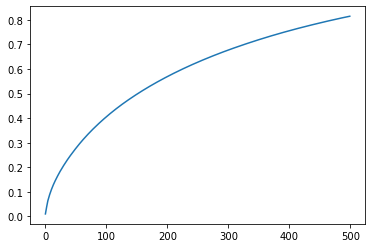

In [121]:
plt.plot(range(svd_object.explained_variance_ratio_.shape[0]), svd_object.explained_variance_ratio_.cumsum())

In [122]:
normalized_tfidf = normalize(TruncatedSVD(n_components=100).fit_transform(tfidf_skills))

# K-Means Clustering

In [123]:
from sklearn.cluster import KMeans

In [124]:
k_values = range(1, 50)
inertia_values = [KMeans(k).fit(normalized_tfidf).inertia_ for k in k_values]

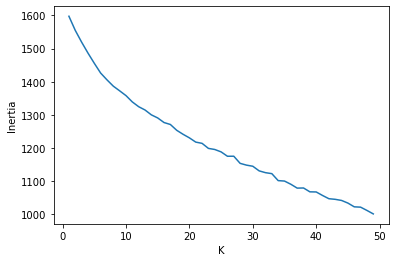

In [125]:
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [126]:
k = 15

In [127]:
df_sample = df.iloc[1:301,:]

In [191]:
np.random.seed(0)

def compute_cluster_groups(norm_mat, k=k, bullets=tfidf_skills):
    kmodel = KMeans(n_clusters=k)
    clusters = kmodel.fit_predict(norm_mat)
    df_clustered = pd.DataFrame({'Index':range(clusters.size), 
                                 'Cluster':clusters, 
                                 'Bullet': bullets})

    return [df_cluster for _, df_cluster in df_clustered.groupby('Cluster')]

cluster_groups = compute_cluster_groups(normalized_tfidf)

[ 4  3 11 ...  3  3  3]
1679


In [129]:
from wordcloud import WordCloud

In [130]:
def cluster_to_image(df_cluster, max_words=20, 
                     tfidf_arr=tfidf_skills,
                     vectorizer=bullet_vectorizer):

    indices = df_cluster.Index.values
    summed_tfidf = np.asarray(tfidf_arr[indices].sum(axis=0))[0]

    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word:score for word, score in df_ranked_words[:max_words].values if score!=0}
    cloud_generator = WordCloud(background_color='white', color_func=_color_func, random_state=1)
    word_cloud_image = cloud_generator.fit_words(words_to_score)
    return word_cloud_image
    
def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown', 'red', 'pink'])


In [167]:
def show_cluster_as_image(cluster_id):
    word_cloud_image = cluster_to_image(cluster_groups[cluster_id])
    plt.imshow(word_cloud_image, interpolation="bilinear")
    plt.show()


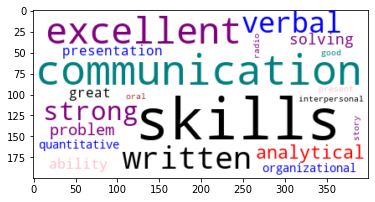

In [132]:
word_cloud_image = cluster_to_image(cluster_groups[2])
plt.imshow(word_cloud_image, interpolation="bilinear")
plt.show()

In [133]:
def print_requirements_in_cluster(c_id):
    df_clust = cluster_groups[c_id]
    for bullet in np.random.choice(bullet_points, 5, replace=False):
        print(f" - {bullet}\n")

In [134]:
print_requirements_in_cluster(0)

 - The chance to join a major global tech company

 - Must be able to thrive in a fast-paced, rapidly evolving environment with varying priorities, based on a team building culture.

 - Identify valuable data sources and automate collection processes

 - Experience in machine learning/deep learning-based algorithms with structured/unstructured data.

 - Build tools to automate enrichment for future projects. As the primary user of our internal tools, you'll be uniquely positioned to grow our functionality.



In [135]:
def plot_wordcloud_all_clusters(cluster_groups=cluster_groups, k=k):
    cols = 3
    rows = k // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    axes = axes.flatten()
    
    for i in range(0, k):
        img = cluster_to_image(cluster_groups[i])
        axes[i].imshow(img, interpolation='bilinear')
        axes[i].set_title(f"Cluster {i}")
        axes[i].set_xticks([])
        axes[i].set_yticks([])

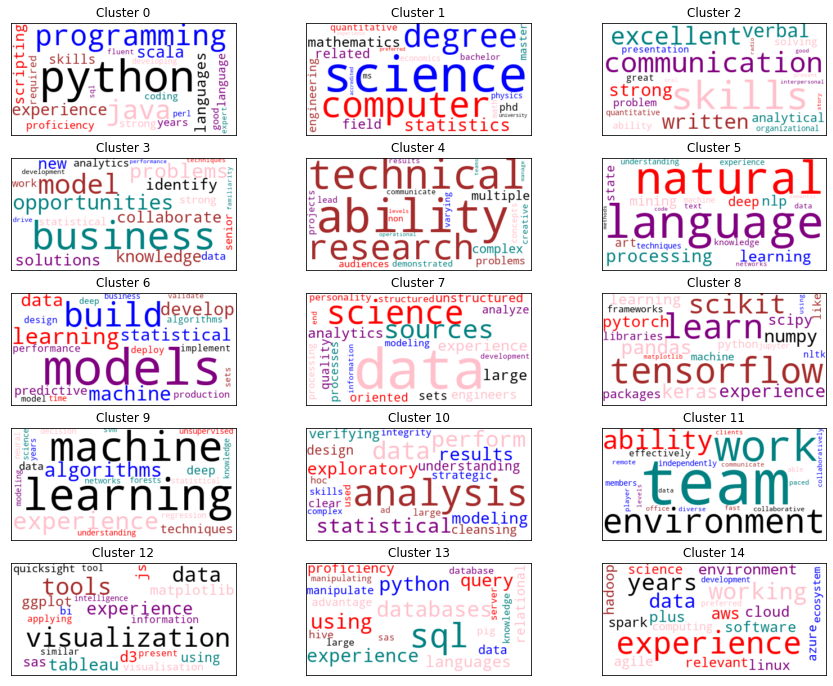

In [136]:
plot_wordcloud_all_clusters(cluster_groups)

In [137]:
print_requirements_in_cluster(14)

 - Plan and manage engagement objectives and key deliverables using analytics processes to mitigate risks in data, modeling, validation and delivery

 - 7+ years of practical experience applying data science to solve complex problems

 - Strong problem-solving skills with an emphasis on sales and marketing predictive analytics.

 - Engineer new features to enrich already complex data.

 - Ability to work collaboratively in a team environment and effectively with people at all levels in an organization



# Missing Skills

In [138]:
bullet_points_with_resume = [resume_clean] + bullet_points

In [139]:
bullet_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_skills_with_resume = bullet_vectorizer.fit_transform(bullet_points_with_resume)

In [145]:
tfidf_skills_with_resume.shape

(1680, 2542)

In [144]:
tfidf_skills_with_resume[1:].shape

(1679, 2542)

In [146]:
tfidf_skills_with_resume[0].shape

(1, 2542)

In [147]:
tfidf_skills_with_resume = tfidf_skills_with_resume.toarray()

In [149]:
bullets_sim = tfidf_skills_with_resume[1:] @ tfidf_skills_with_resume[0]

In [150]:
bullets_sim.shape

(1679,)

In [151]:
bullets_sim[:5]

array([0.01509523, 0.01020422, 0.        , 0.02057493, 0.        ])

In [153]:
normalized_tfidf.shape

(1679, 100)

In [155]:
len(cluster_groups)

15

In [159]:
bullets_sim[cluster_groups[14].Index.values].mean()

0.02429086827435205

In [160]:
bullets_sim[cluster_groups[0].Index.values].mean()

0.07483042928244421

In [162]:
resume_clean

'good student data scientist good student fake street city qt noreplyfakesitecom skills python pandas machine learning natural language processing experience manning data analyst oct present remote analyzed visualized vast amounts data using pandas python matplotlib education berkeley bs mathematics august may berkeley ca graduated summa cum laude awards tau beta pi honors society'

In [163]:
bullets_sim[cluster_groups[8].Index.values].mean()

0.0572335349618974

In [164]:
mean_similarities = [bullets_sim[cluster.Index.values].mean() for cluster in cluster_groups]

In [172]:
sorted_indices = np.argsort(mean_similarities)

## Clusters containing Missing Skills

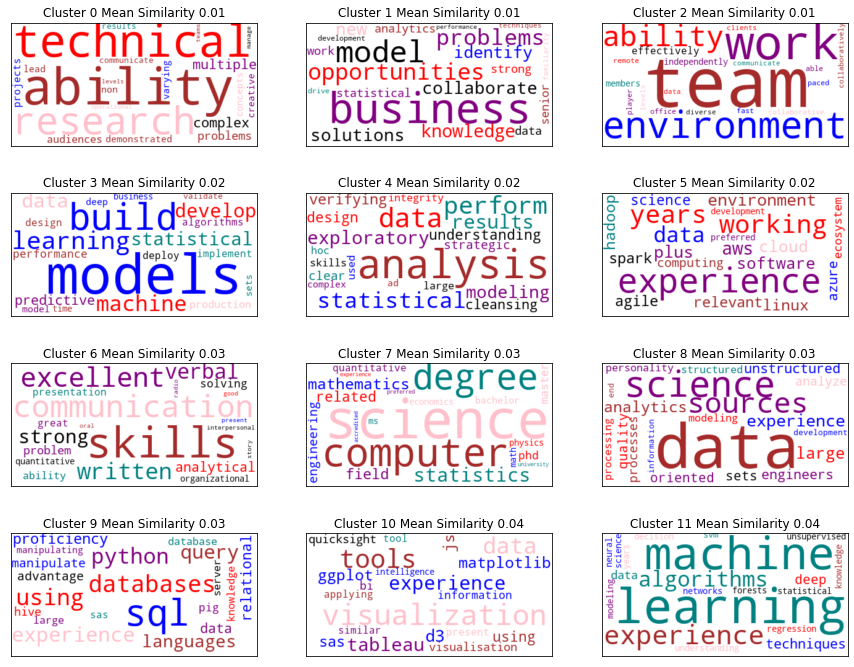

In [186]:
cols = 3
rows = 12 // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()
i = 0

for index in sorted_indices:
    if mean_similarities[index] < 0.05:
        img = cluster_to_image(cluster_groups[index])
        axes[i].imshow(img, interpolation='bilinear')
        axes[i].set_title(f"Cluster {i} Mean Similarity {mean_similarities[index]:.2f}")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        i += 1

## Clusters with Similar Skills

In [187]:
num_clusters = 0
for index in sorted_indices:
    if mean_similarities[index] >= 0.05:
        num_clusters += 1

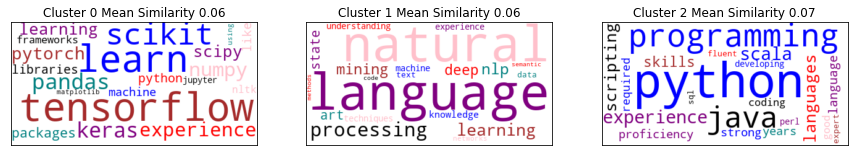

In [188]:
cols = 3
rows = num_clusters // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()
i = 0

for index in sorted_indices:
    if mean_similarities[index] >= 0.05:
        img = cluster_to_image(cluster_groups[index])
        axes[i].imshow(img, interpolation='bilinear')
        axes[i].set_title(f"Cluster {i} Mean Similarity {mean_similarities[index]:.2f}")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        i += 1

In [189]:
num_clusters

3